#**câu a**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
NAME = 'Nguyễn Đức Khoa – 6351071034'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/datasets/heart.csv')
print('Dataset loaded successfully.')
print(NAME)

Dataset loaded successfully.
Nguyễn Đức Khoa – 6351071034


In [ ]:
initial_rows = df.shape[0]
df = df.dropna()
print(f"Removed {initial_rows - df.shape[0]} rows with missing values.")
print(f"DataFrame now has {df.shape[0]} rows and {df.shape[1]} columns.")
print(NAME)

Removed 0 rows with missing values.
DataFrame now has 303 rows and 14 columns.
Nguyễn Đức Khoa – 6351071034


In [ ]:
print("DataFrame before renaming:")
display(df.head())

df.columns = new_column_names
print("Columns renamed successfully.")
display(df.head())
print(NAME)

DataFrame before renaming:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns renamed successfully.


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Nguyễn Đức Khoa – 6351071034


#**CÂU 3: Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ.**

Nguyễn Đức Khoa – 6351071034


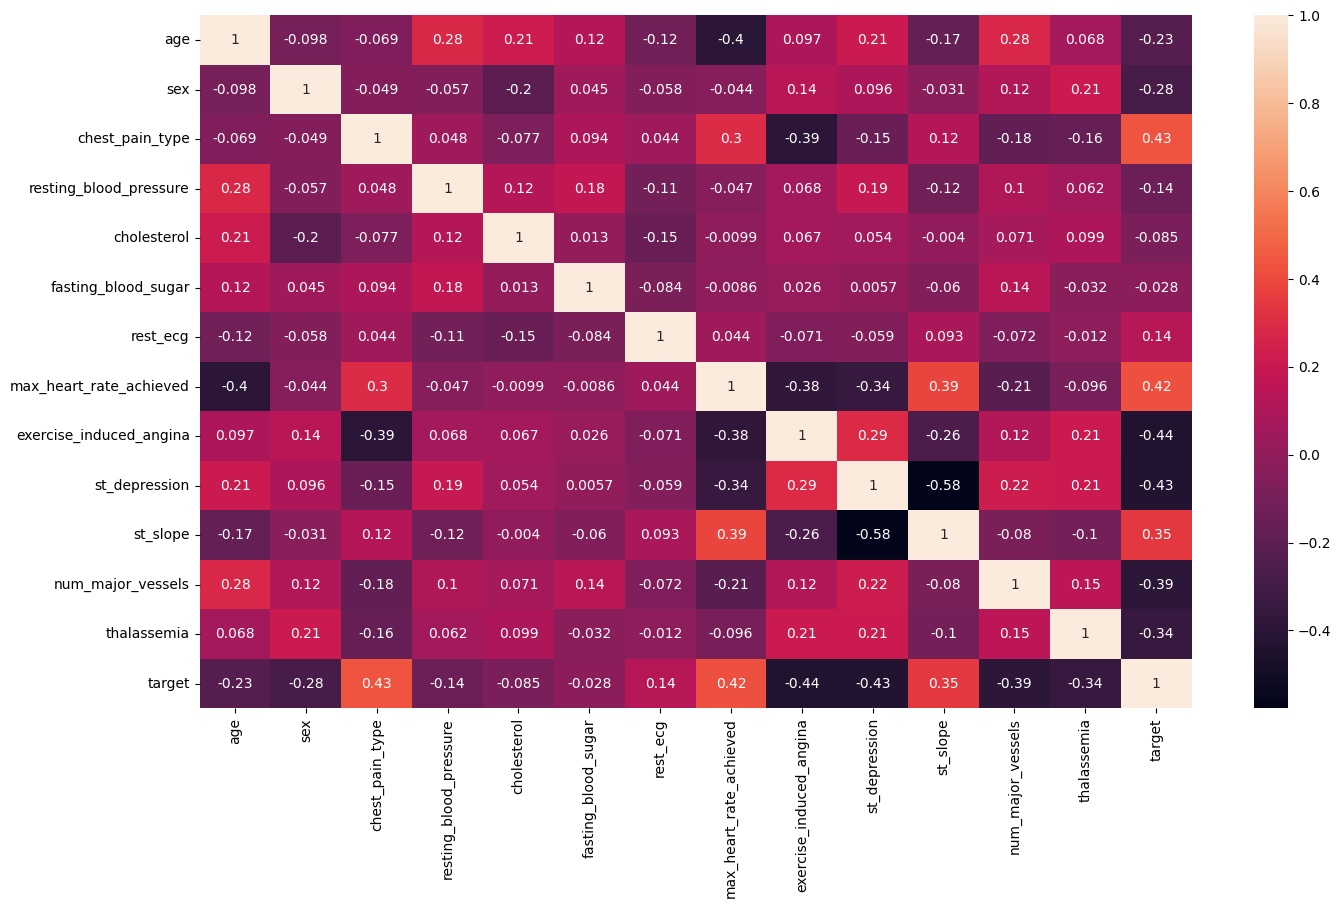

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(method='pearson'), annot=True)
print(NAME)

# 4. Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định

In [ ]:
print(NAME)
features = df.drop('target', axis= 1)
labels = df['target']

Nguyễn Đức Khoa – 6351071034


#5. Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện.

In [ ]:
print(NAME)
features.select_dtypes(exclude=['int64']).columns

Nguyễn Đức Khoa – 6351071034


Index(['st_depression'], dtype='object')

In [ ]:
print(NAME)
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

Nguyễn Đức Khoa – 6351071034


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,...,st_depression_3.2,st_depression_3.4,st_depression_3.5,st_depression_3.6,st_depression_3.8,st_depression_4.0,st_depression_4.2,st_depression_4.4,st_depression_5.6,st_depression_6.2
0,63,1,3,145,233,1,0,150,0,0,...,False,False,False,False,False,False,False,False,False,False
1,37,1,2,130,250,0,1,187,0,0,...,False,False,True,False,False,False,False,False,False,False
2,41,0,1,130,204,0,0,172,0,2,...,False,False,False,False,False,False,False,False,False,False
3,56,1,1,120,236,0,1,178,0,2,...,False,False,False,False,False,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,False,False,False,False,False,False,False,False,False,False
299,45,1,3,110,264,0,1,132,0,1,...,False,False,False,False,False,False,False,False,False,False
300,68,1,0,144,193,1,1,141,0,1,...,False,True,False,False,False,False,False,False,False,False
301,57,1,0,130,131,0,1,115,1,1,...,False,False,False,False,False,False,False,False,False,False


#6. Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.

In [ ]:
from sklearn.model_selection import train_test_split

print(NAME)
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Nguyễn Đức Khoa – 6351071034
X_train shape: (242, 52)
X_test shape: (61, 52)
y_train shape: (242,)
y_test shape: (61,)


#7. Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

In [ ]:
print(NAME)
lf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

Nguyễn Đức Khoa – 6351071034


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print(NAME)
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report: ",metrics.classification_report(y_test, tree_pred))

Nguyễn Đức Khoa – 6351071034
Accuracy:  0.7868852459016393
Report:                precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



Nguyễn Đức Khoa – 6351071034


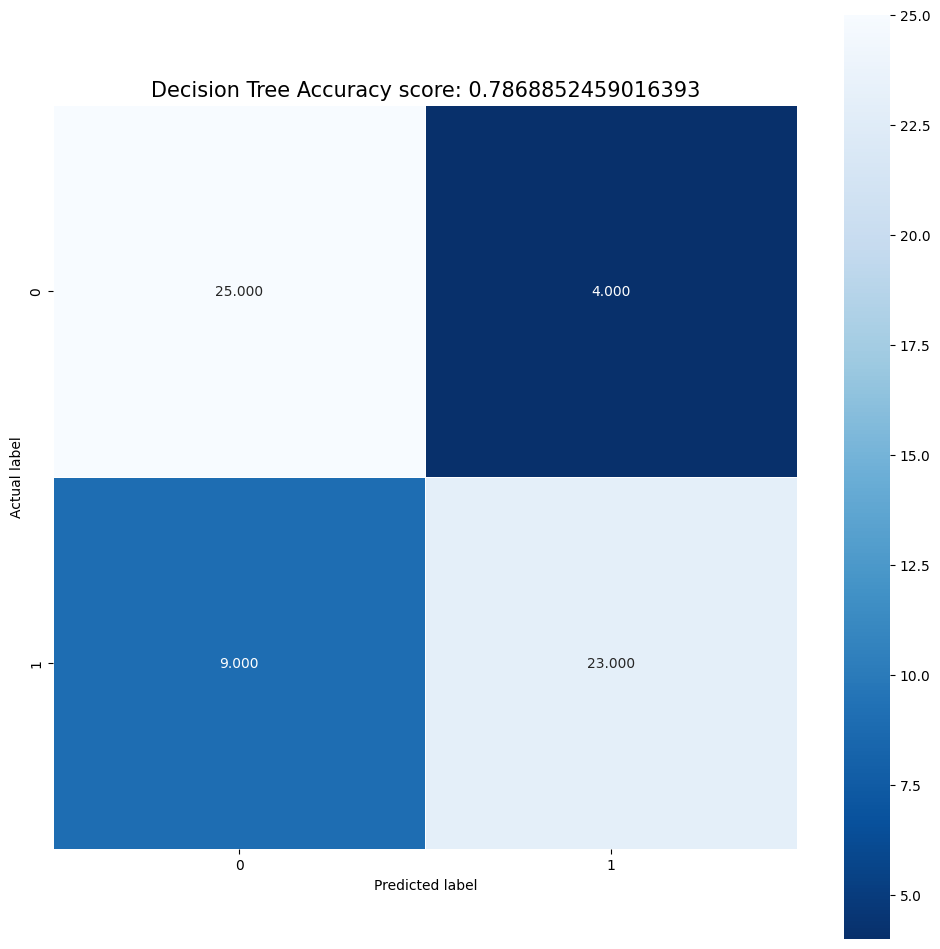

In [ ]:
print(NAME)
#ma tran nham lan
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy score: {0}'.format(tree_score)
plt.title(title, size=15);

Nguyễn Đức Khoa – 6351071034


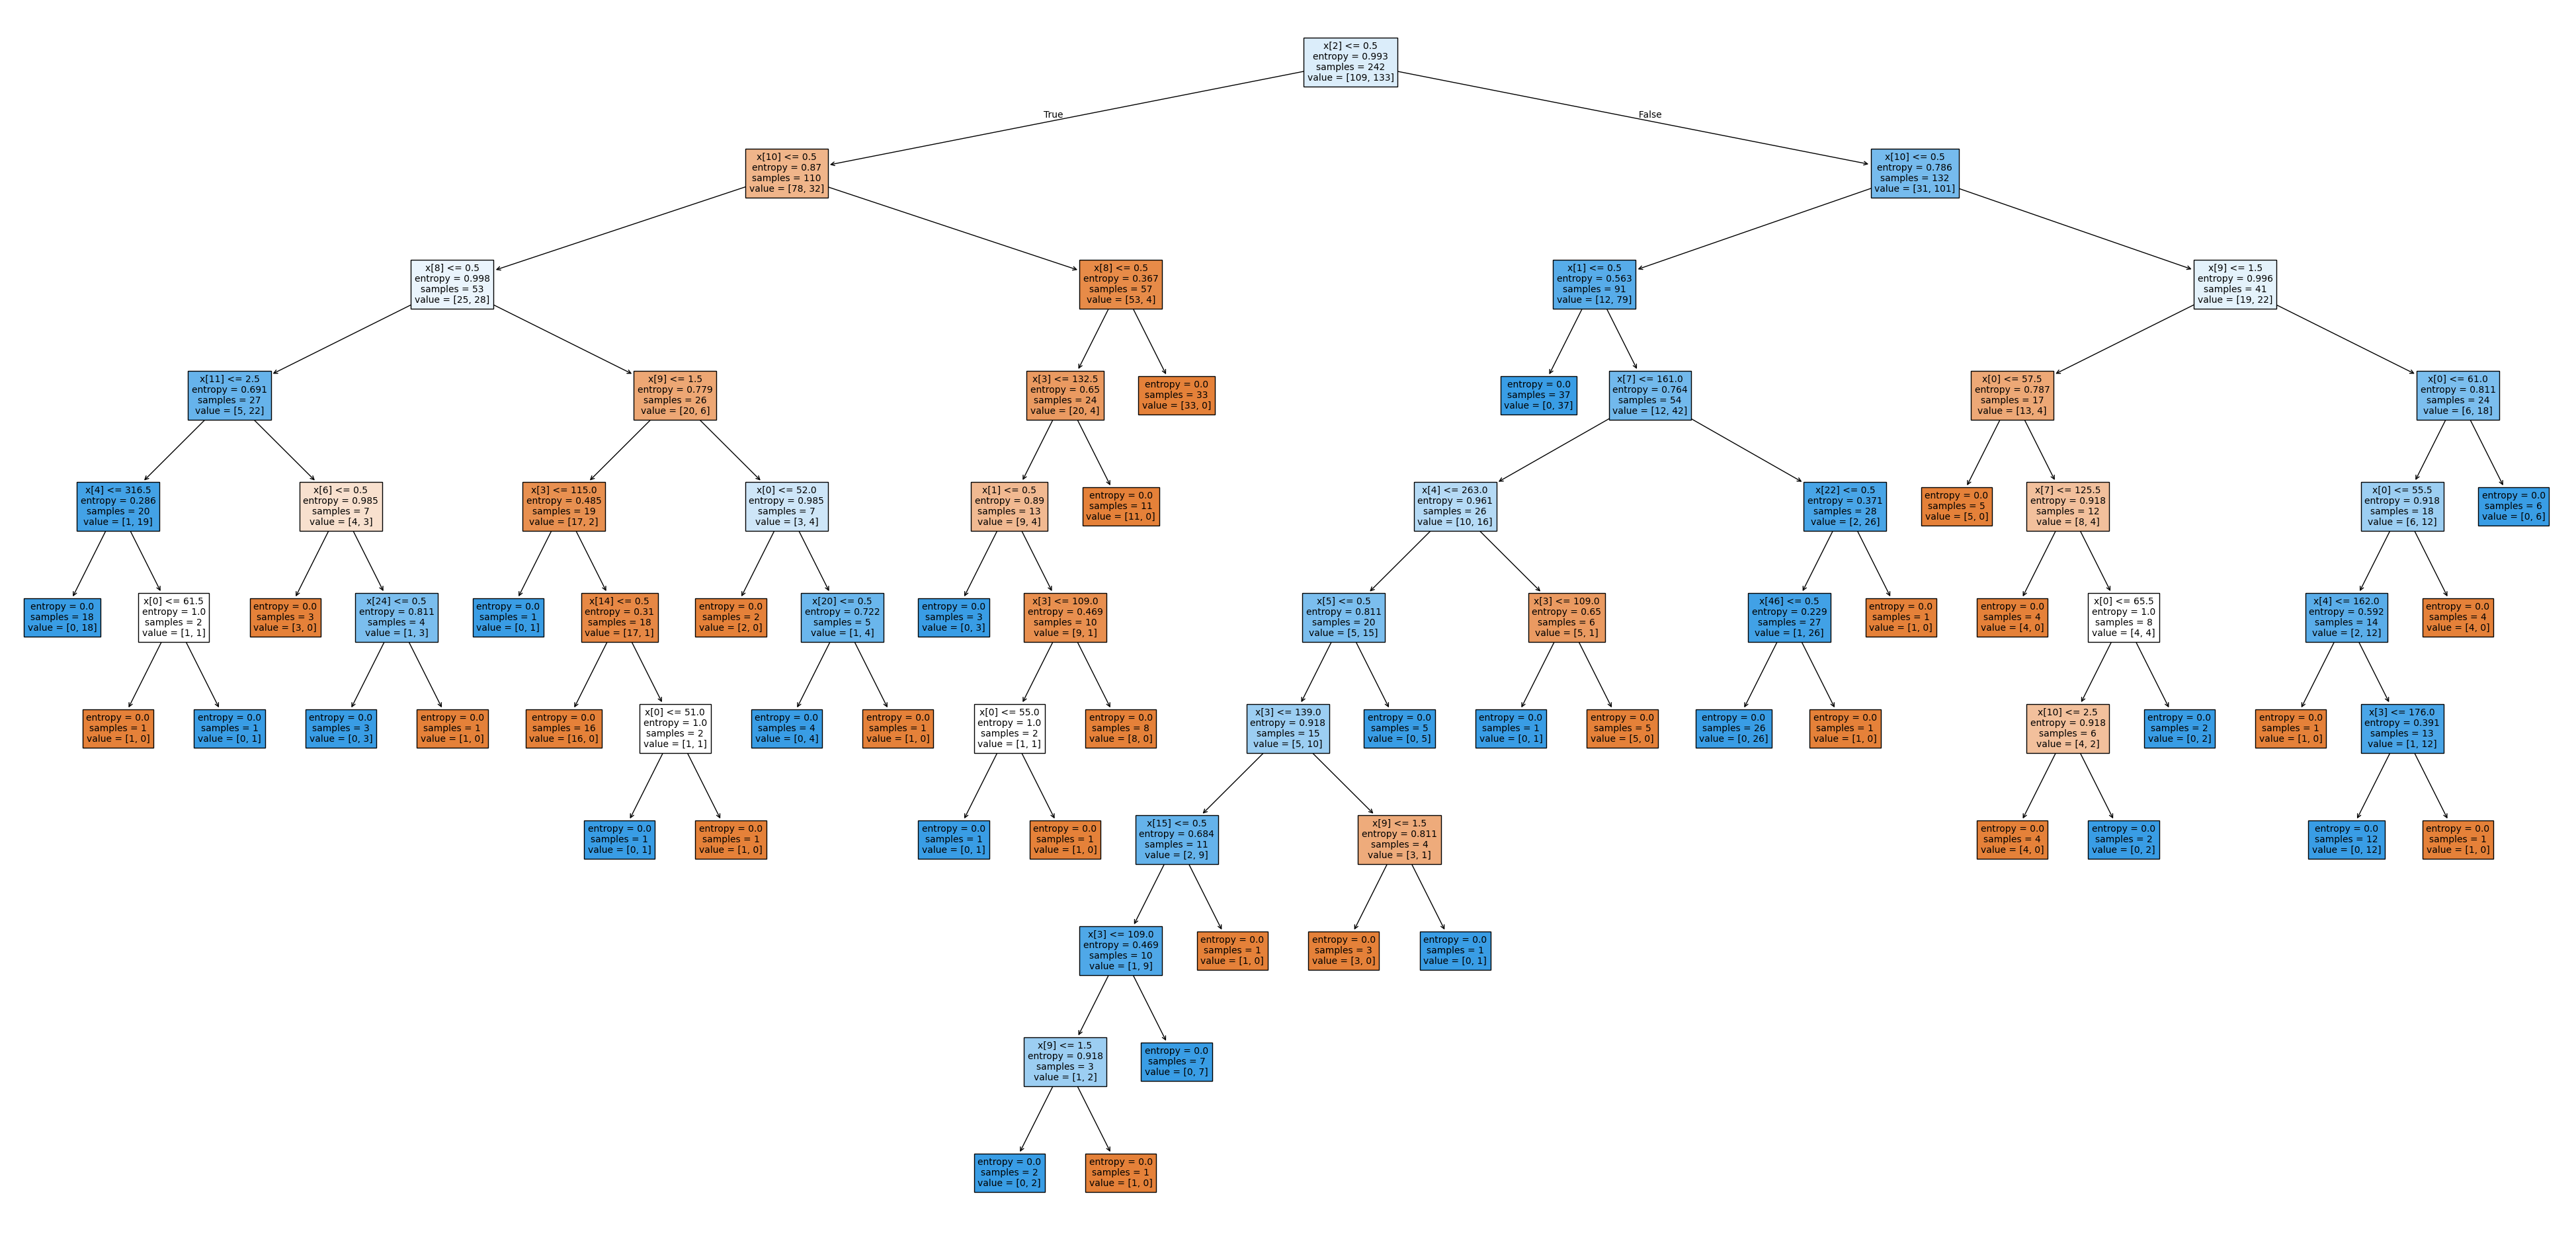

In [ ]:
print(NAME)
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree', dpi=100)
plt.show()
#

#8 Lặp lại yêu cầu 7 đối với cây CART.

In [ ]:
print(NAME)
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_cart.fit(X_train, y_train)
print("CART Decision Tree Model created and trained successfully.")

Nguyễn Đức Khoa – 6351071034
CART Decision Tree Model created and trained successfully.


In [ ]:
print(NAME)
cart_pred = clf_cart.predict(X_test)

cart_score = metrics.accuracy_score(y_test, cart_pred)
print(f"CART Accuracy: {cart_score}")
print("CART Classification Report: ")
print(metrics.classification_report(y_test, cart_pred))

Nguyễn Đức Khoa – 6351071034
CART Accuracy: 0.7868852459016393
CART Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



Nguyễn Đức Khoa – 6351071034


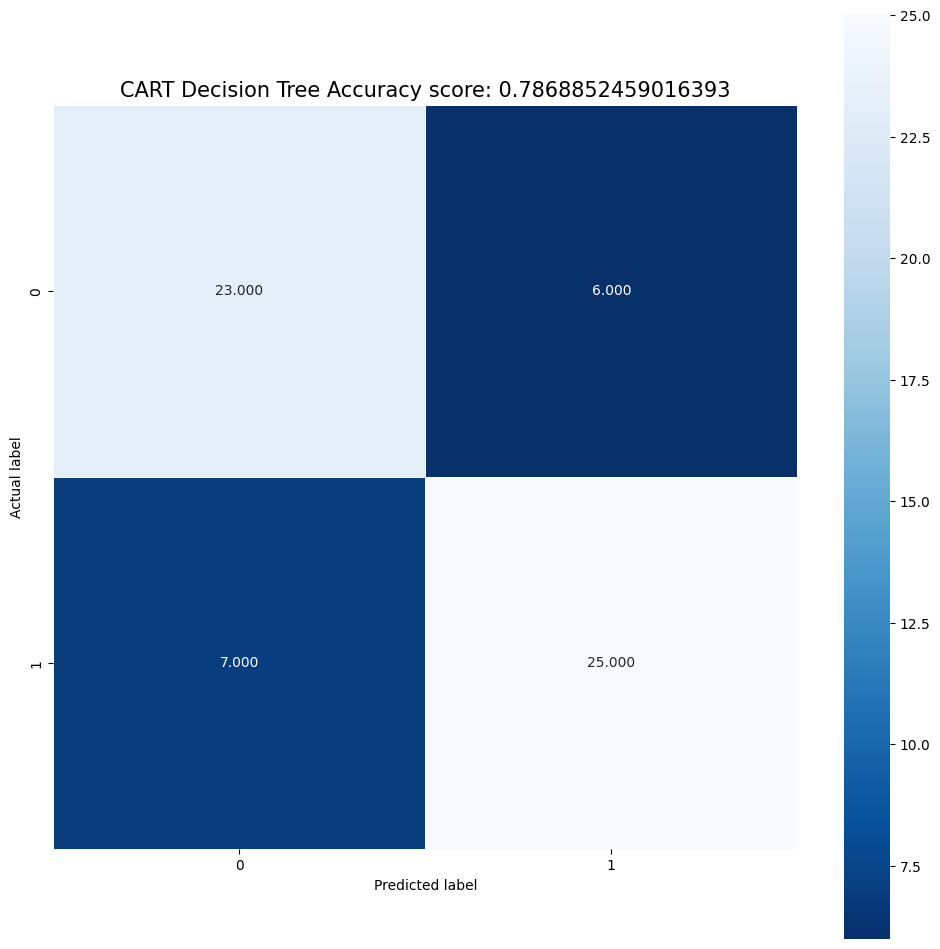

In [ ]:
print(NAME)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)

plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'CART Decision Tree Accuracy score: {0}'.format(cart_score)
plt.title(title, size=15);
plt.show()

Nguyễn Đức Khoa – 6351071034


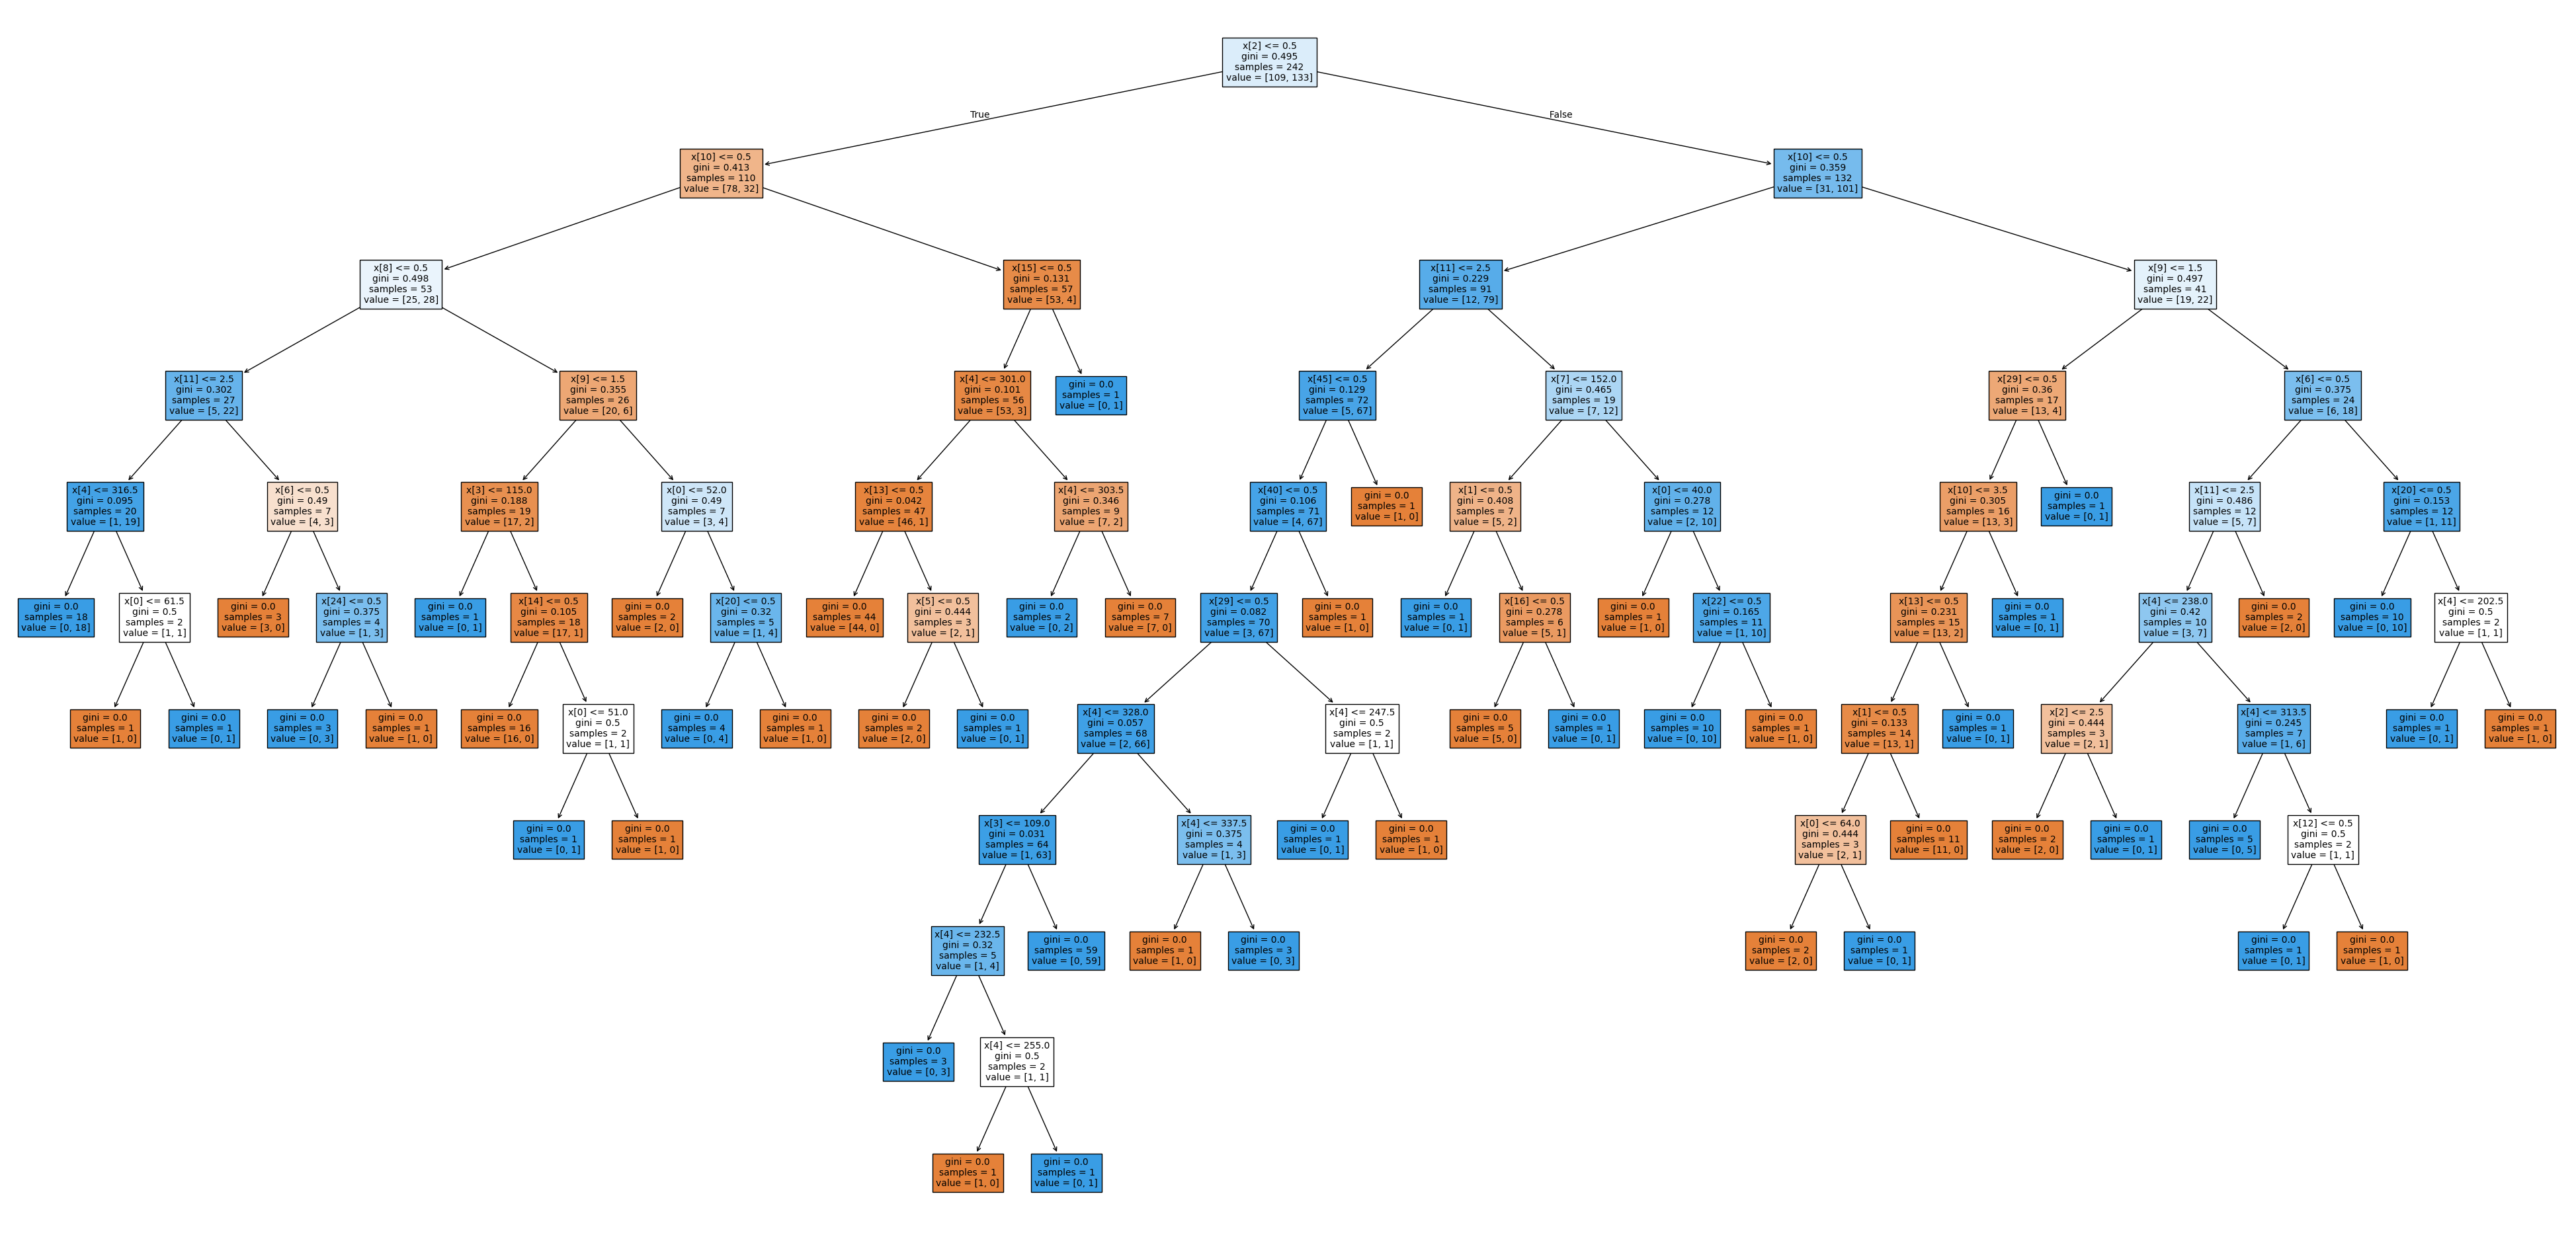

In [ ]:
print(NAME)
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.savefig('cart_decision_tree', dpi=100)
plt.show()

#9 Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được.

In [ ]:
print(NAME)
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

Nguyễn Đức Khoa – 6351071034


In [ ]:
print(NAME)
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print(f"Naive Bayes Accuracy: {bayes_score}")
print("Naive Bayes Classification Report: ")
print(metrics.classification_report(y_test, bayes_pred))

Nguyễn Đức Khoa – 6351071034
Naive Bayes Accuracy: 0.6065573770491803
Naive Bayes Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.31      0.43        29
           1       0.58      0.88      0.70        32

    accuracy                           0.61        61
   macro avg       0.64      0.59      0.56        61
weighted avg       0.64      0.61      0.57        61



Nguyễn Đức Khoa – 6351071034


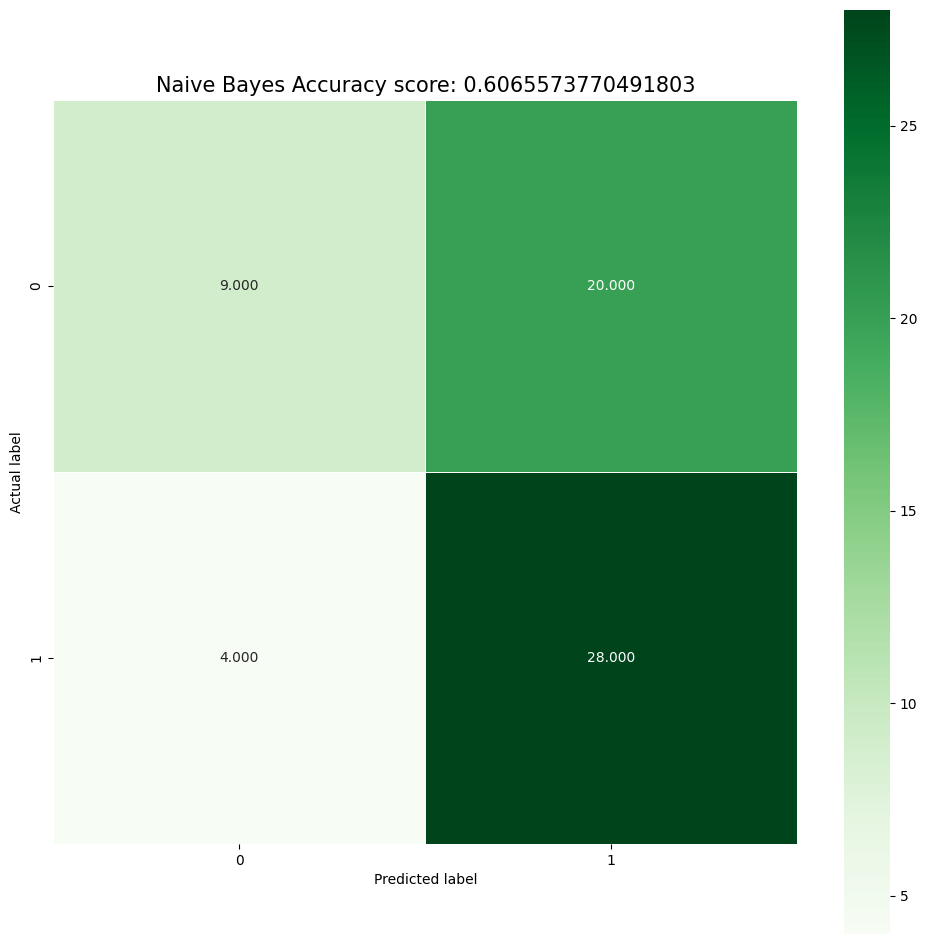

In [ ]:
print(NAME)
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,  annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy score: {0}'.format(bayes_score)
plt.title(title, size=15);
#

#10.So sánh kết quả của các mô hình trên.

In [ ]:
print(NAME)
print(f"--- So sánh hiệu suất các Mô hình --- ")
print(f"ID3 Decision Tree Accuracy: {tree_score:.4f}")
print(f"CART Decision Tree Accuracy: {cart_score:.4f}")
print(f"Naive Bayes Accuracy: {bayes_score:.4f}")

print("1. **Mô hình Cây quyết định ID3 (Entropy):**")
print(f"   - Độ chính xác (Accuracy): {tree_score:.4f}")
print(f"   - Báo cáo phân loại (Classification Report):\n{metrics.classification_report(y_test, tree_pred)}")
print(f"   - Ma trận nhầm lẫn (Confusion Matrix):\n{tree_cm}\n")
print("   *Nhận xét*: Mô hình ID3 cho thấy khả năng phân loại khá tốt. Độ chính xác gần 79% là một con số đáng khích lệ. Từ ma trận nhầm lẫn, chúng ta có thể thấy số lượng dự đoán đúng (True Positives và True Negatives) khá cao. Precision và Recall cho cả hai lớp (không bệnh tim và có bệnh tim) đều ở mức tương đối cân bằng, thể hiện mô hình không quá thiên vị cho một lớp nào.\n")

print("2. **Mô hình Cây quyết định CART (Gini):**")
print(f"   - Độ chính xác (Accuracy): {cart_score:.4f}")
print(f"   - Báo cáo phân loại (Classification Report):\n{metrics.classification_report(y_test, cart_pred)}")
print(f"   - Ma trận nhầm lẫn (Confusion Matrix):\n{cart_cm}\n")
print("   *Nhận xét*: Tương tự như ID3, mô hình CART cũng đạt độ chính xác tương đương (khoảng 79%). Điều này cho thấy với tập dữ liệu này, việc sử dụng Gini impurity hay Entropy để phân tách nút không tạo ra sự khác biệt lớn về hiệu suất tổng thể. Các chỉ số Precision, Recall và F1-score cũng khá giống với ID3, chứng tỏ cả hai phương pháp cây quyết định đều có hiệu quả tương đương.\n")

print("3. **Mô hình Naive Bayes (GaussianNB):**")
print(f"   - Độ chính xác (Accuracy): {bayes_score:.4f}")
print(f"   - Báo cáo phân loại (Classification Report):\n{metrics.classification_report(y_test, bayes_pred)}")
print(f"   - Ma trận nhầm lẫn (Confusion Matrix):\n{bayes_cm}\n")
print("   *Nhận xét*: Mô hình Naive Bayes có độ chính xác thấp hơn đáng kể (khoảng 61%) so với hai mô hình cây quyết định. Điều này có thể do giả định độc lập có điều kiện của Naive Bayes không hoàn toàn phù hợp với bản chất dữ liệu. Đặc biệt, Precision và Recall cho lớp 0 (không bệnh tim) thấp hơn nhiều so với lớp 1 (có bệnh tim), cho thấy mô hình này gặp khó khăn trong việc xác định chính xác bệnh nhân không mắc bệnh tim (nhiều False Positive và False Negative hơn). Điều này dẫn đến một sự mất cân bằng trong dự đoán.\n")

print("**Kết luận chung:**\n")
print("Từ kết quả trên, chúng ta có thể thấy rằng cả hai mô hình cây quyết định (ID3 và CART) đều vượt trội hơn đáng kể so với mô hình Naive Bayes trên tập dữ liệu này, xét về độ chính xác tổng thể. Hiệu suất tương đồng giữa ID3 và CART cho thấy cả hai thuật toán này đều là lựa chọn tốt cho bài toán phân loại này. Trong các ứng dụng y tế, việc phân tích sâu hơn Precision và Recall là cực kỳ quan trọng để đảm bảo rằng mô hình không bỏ sót các trường hợp bệnh (độ nhạy cao - high Recall cho lớp dương tính) hoặc đưa ra quá nhiều cảnh báo sai (độ chính xác cao - high Precision cho lớp dương tính).\n")


Nguyễn Đức Khoa – 6351071034
--- So sánh hiệu suất các Mô hình --- 
ID3 Decision Tree Accuracy: 0.7869
CART Decision Tree Accuracy: 0.7869
Naive Bayes Accuracy: 0.6066
1. **Mô hình Cây quyết định ID3 (Entropy):**
   - Độ chính xác (Accuracy): 0.7869
   - Báo cáo phân loại (Classification Report):
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

   - Ma trận nhầm lẫn (Confusion Matrix):
[[25  4]
 [ 9 23]]

   *Nhận xét*: Mô hình ID3 cho thấy khả năng phân loại khá tốt. Độ chính xác gần 79% là một con số đáng khích lệ. Từ ma trận nhầm lẫn, chúng ta có thể thấy số lượng dự đoán đúng (True Positives và True Negatives) khá cao. Precision và Recall cho cả hai lớp (không bệnh tim và có bệnh tim) đều ở mức tương đối cân 